ВАРИАНТ 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize

Задание 1

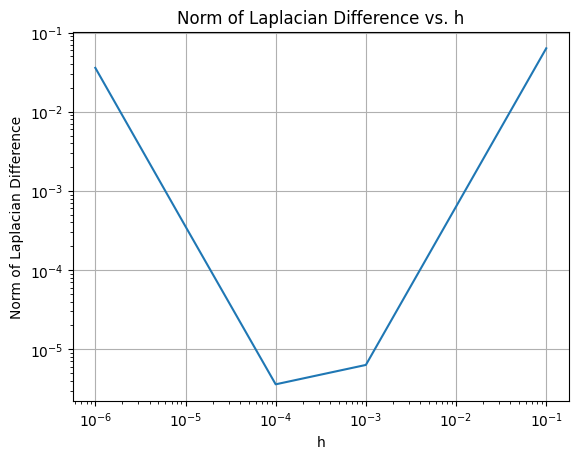

In [2]:
def f(x, y):
    return np.log(1 / np.sqrt(x**2 + y**2))

def d2f_dx2(x, y):
    return (x**2 - y**2) / (x**2 + y**2)**2

def d2f_dy2(x, y):
    return (y**2 - x**2) / (x**2 + y**2)**2

def d2f_dx2_approx(x, y, h):
    return (f(x + h, y) - 2*f(x, y) + f(x - h, y)) / h**2

def d2f_dy2_approx(x, y, h):
    return (f(x, y + h) - 2*f(x, y) + f(x, y - h)) / h**2

x = np.linspace(1, 2, 100)
y = np.linspace(1, 2, 100)
X, Y = np.meshgrid(x, y)

h_vals = np.logspace(-1, -6, 6)
norms = []

for h in h_vals:
    laplacian_analytic = d2f_dx2(X, Y) + d2f_dy2(X, Y)
    laplacian_approx = d2f_dx2_approx(X, Y, h) + d2f_dy2_approx(X, Y, h)
    norm = np.linalg.norm(laplacian_analytic - laplacian_approx)
    norms.append(norm)

plt.loglog(h_vals, norms)
plt.xlabel("h")
plt.ylabel("Norm of Laplacian Difference")
plt.title("Norm of Laplacian Difference vs. h")
plt.grid(True)
plt.show()

Задание 2

Central Rectangle: 1.5079505436210607, Error (apriori): 8.74666666666667e-05
Trapezoidal (h=0.4): 1.5064553404314722
Trapezoidal (h=0.2): 1.5072029420262665
Trapezoidal Error (Runge): 0.00024920053159808536
Trapezoidal Runge: 1.5074521425578646
Simpson: 1.5074037778802634, Error (apriori): 9.102222222222225e-08


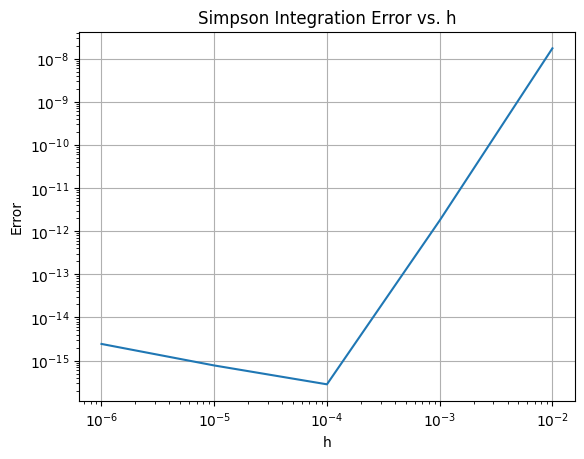

In [3]:
def f(x):
    return np.exp(-0.1 / x)

def central_rectangle(a, b, h):
    n = int((b - a) / h)
    integral = 0
    for i in range(n):
        xi = a + (i + 0.5) * h
        integral += f(xi)
    integral *= h
    return integral

def trapezoidal(a, b, h):
    n = int((b - a) / h)
    integral = (f(a) + f(b)) / 2
    for i in range(1, n):
        xi = a + i * h
        integral += f(xi)
    integral *= h
    return integral

def simpson(a, b, h):
    n = int((b - a) / h)
    integral = f(a) + f(b)
    for i in range(1, n, 2):
        xi = a + i * h
        integral += 4 * f(xi)
    for i in range(2, n - 1, 2):
        xi = a + i * h
        integral += 2 * f(xi)
    integral *= h / 3
    return integral

a = 1.0
b = 2.6
h = 0.4
integral_cr = central_rectangle(a, b, h)
M2 = 0.0082 
error_cr = (b - a) * h**2 * M2 / 24
print(f"Central Rectangle: {integral_cr}, Error (apriori): {error_cr}")


integral_t1 = trapezoidal(a, b, 0.4)
integral_t2 = trapezoidal(a, b, 0.2)
error_t = abs(integral_t1 - integral_t2) / 3
integral_t_runge = integral_t2 + error_t
print(f"Trapezoidal (h=0.4): {integral_t1}")
print(f"Trapezoidal (h=0.2): {integral_t2}")
print(f"Trapezoidal Error (Runge): {error_t}")
print(f"Trapezoidal Runge: {integral_t_runge}")


integral_s = simpson(a, b, 0.4)
M4 = 0.0004
error_s = (b-a)*h**4*M4/180
print(f"Simpson: {integral_s}, Error (apriori): {error_s}")

h_values = [10**(-k) for k in range(1, 7)]
errors = []
integral_prev = simpson(a, b, h_values[0])
for h in h_values[1:]:
    integral_current = simpson(a, b, h)
    error = abs(integral_current - integral_prev) / (2**4 - 1)
    errors.append(error)
    integral_prev = integral_current

plt.loglog(h_values[1:], errors)
plt.xlabel("h")
plt.ylabel("Error")
plt.title("Simpson Integration Error vs. h")
plt.grid(True)
plt.show()

Задание 3

In [4]:
x_data = np.array([2.2, 2.4, 2.6, 2.8, 3.0])
y_data = np.array([4.457, 5.466, 6.695, 8.198, 10.019])

def lagrange(x, x_data, y_data):
    n = len(x_data)
    result = 0.0
    for i in range(n):
        term = y_data[i]
        for j in range(n):
            if i != j:
                term *= (x - x_data[j]) / (x_data[i] - x_data[j])
        result += term
    return result


def f_to_solve(x):
    return lagrange(x, x_data, y_data) - 5


x_interp = optimize.fsolve(f_to_solve, 2.3)  # Начальное приближение


def true_f(x):
    return np.sinh(x) - 5

x_true = optimize.fsolve(true_f, 2.3)

print(f"Интерполированное значение x: {x_interp[0]}")
print(f"Истинное значение x: {x_true[0]}")
print(f"Абсолютная ошибка: {abs(x_interp[0] - x_true[0])}")

Интерполированное значение x: 2.312296646532374
Истинное значение x: 2.3124383412727525
Абсолютная ошибка: 0.00014169474037828422


Задание 4

In [5]:
def series_sum(x, epsilon=1e-6):
    sum_ = 0.0
    n = 1
    term = 1.0 
    while abs(term) > epsilon:
        term = ((n**2 + 1) / (n**4 + n**2 + 1)) * np.cos(n * x) * (-1)**(n - 1)
        sum_ += term
        n += 1
    return sum_, n-1 

x = np.pi / 4
sum_value, num_terms = series_sum(x)

print(f"Сумма ряда при x = {x}: {sum_value}")
print(f"Число слагаемых: {num_terms}")

Сумма ряда при x = 0.7853981633974483: 0.4714045207910317
Число слагаемых: 2


Задание 5

In [6]:
def dft(y):
    N = len(y)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += y[n] * np.exp(-1j * 2 * np.pi * k * n / N)
    return X


y = np.array([0, 3, 2, 0])
X = dft(y)

print("DFT:", X)

DFT: [ 5.+0.0000000e+00j -2.-3.0000000e+00j -1.+1.2246468e-16j
 -2.+3.0000000e+00j]
